# Collinear features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from rfpimp import *
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/rent.csv")
features = ['bathrooms','bedrooms','longitude','latitude', 'price']
df = df[features].copy()

# Clip to remove outliers
df = df[(df['latitude']>40.55) & (df['latitude']<40.94) &
        (df['longitude']>-74.1) & (df['longitude']<-73.67)]
df = df[(df.price>1_000) & (df.price<10_000)]

df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train[['bedrooms','bathrooms','latitude','longitude']]
y_train = df_train['price']
X_test = df_test[['bedrooms','bathrooms','latitude','longitude']]
y_test = df_test['price']

rf = RandomForestRegressor(oob_score=True, n_estimators=100, n_jobs=-1)

## Drop column

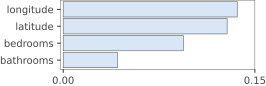

In [3]:
I = dropcol_importances(rf, X_train, y_train, X_test, y_test)
viz = plot_importances(I)
viz.save('../article/images/collinear_dropcol.svg')
viz

## Permute importance with validation set

0.859024519549119


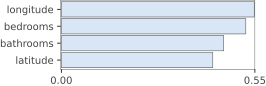

In [4]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
print(rf.oob_score_)

I = importances(rf, X_test, y_test)
viz = plot_importances(I)
viz.save('../article/images/collinear_permute.svg')
viz

Wall time: 7.51 s


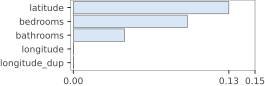

In [5]:
X_train_drop = X_train.copy()
X_train_drop['longitude_dup'] = X_train_drop.longitude
X_test_drop = X_test.copy()
X_test_drop['longitude_dup'] = X_test_drop.longitude
%time I = dropcol_importances(rf, X_train_drop, y_train, X_test_drop, y_test)
viz = plot_importances(I, label_fontsize=9)
viz.save('../article/images/collinear_dropcol_longitude_dup.svg')
viz

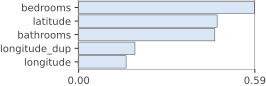

In [6]:
X_train_perm = X_train.copy()
X_train_perm['longitude_dup'] = X_train_perm.longitude
X_test_perm = X_test.copy()
X_test_perm['longitude_dup'] = X_test_perm.longitude

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save('../article/images/collinear_permute_longitude_dup.svg')
viz

# Add noise to permute imp

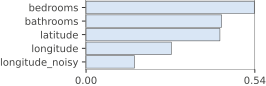

In [7]:
X_train_perm = X_train.copy()
X_train_perm['longitude_noisy'] = X_train_perm.longitude
X_test_perm = X_test.copy()
X_test_perm['longitude_noisy'] = X_test_perm.longitude

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
c = .0005
noise = np.random.random(len(X_train_perm))*c

X_train_perm['longitude_noisy'] = X_train_perm.longitude + noise
rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save(f'../article/images/collinear_permute_longitude_noise_{c:.4f}.svg')
viz

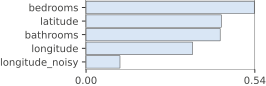

In [8]:
c = .001
X_train_perm = X_train.copy()
X_train_perm['longitude_noisy'] = X_train_perm.longitude
X_test_perm = X_test.copy()
X_test_perm['longitude_noisy'] = X_test_perm.longitude

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
noise = np.random.random(len(X_train_perm))*c

X_train_perm['longitude_noisy'] = X_train_perm.longitude + noise
rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save(f'../article/images/collinear_permute_longitude_noise_{c:.4f}.svg')
viz

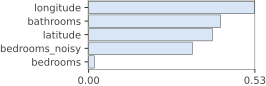

In [9]:
c = 1
X_train_perm = X_train.copy()
noise = np.random.random(len(X_train_perm))*c
X_train_perm['bedrooms_noisy'] = X_train_perm.bedrooms + noise
X_test_perm = X_test.copy()
noise = np.random.random(len(X_test_perm))*c
X_test_perm['bedrooms_noisy'] = X_test_perm.bedrooms + noise

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)

rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save(f'../article/images/collinear_permute_bedrooms_noise_{c:.4f}.svg')
viz

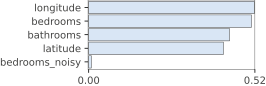

In [10]:
c = 3
X_train_perm = X_train.copy()
noise = np.random.random(len(X_train_perm))*c
X_train_perm['bedrooms_noisy'] = X_train_perm.bedrooms + noise
X_test_perm = X_test.copy()
noise = np.random.random(len(X_test_perm))*c
X_test_perm['bedrooms_noisy'] = X_test_perm.bedrooms + noise

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)

rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save(f'../article/images/collinear_permute_bedrooms_noise_{c:.4f}.svg')
viz

## Cross validation

Wall time: 13.1 s


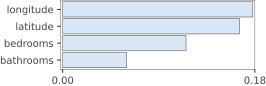

In [11]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
%time I = cv_importances(rf, X_train, y_train)
plot_importances(I)